# Intro
 
Molti problemi, in fisica come in altre discipline, non hanno una soluzione calcolabile nè analiticamente nè computazionalmente. Basti pensare allo sviluppo di nuove proteine, a modelli economici, a certe classi di problemi di ottimizzazione e alla simulazione di sistemi quantistici o che esibiscono proprietà dinamiche peculiari come il *chaos*. La costante di fondo è una non linearità intrinseca in questi problemi che ne rende difficile, se non impossibile, la risoluzione. Per abbattere queste barriere si stanno iniziando a percorrere vie innovative, come l'utilizzo di intelligenze artificiali e lo sviluppo della computazione quantistica. Proprio su quest'ultima verrà posta l'attenzione in questa sede, ed in particolar modo a tecniche collegate al controllo di questi fenomeni non lineari. Dopo una breve introduzione alla computazione quantistica verrà presentata una classe di circuiti quantistici che, in un linguaggio vicino alla fisica dei sistemi non lineari, limitano lo spazio delle fasi accessibile, provocando un'evoluzione essenzialmente *classica* dello stato iniziale.

[1-6]



# Overview del seminario

- breve accenno di computazione quantistica
- circuiti di clifford
- randomized benchmarking  
- perchè *Julia*
- codice *Python*, matrici simplettiche
- implementazione del circuito

# Computazione quantistica


La computazione quantistica è nata negli anni ’80 con la proposta da parte del fisico Paul Benioff della macchina di
turing quantistica. Si comprese (Feynman e Manin) che il
computer quantistico poteva simulare sistemi oltre la portata di
un computer classico e nel ’94 Peter Shor pubblica il suo
algoritmo quantistico, in grado di risolvere il problema di
fattorizzazione dei numeri interi in numeri primi (alla base di
diversi protocolli di crittografia).
L'idea di base della computazione quantistica è l'utilizzo di *qubit* invece dei bit classici. Mentre l'informazione che il bit può contenere è solo o 0 o 1, il qubit è un sistema a due livelli quantistico, che può quindi trovarsi in sovrapposizione di stati. 
E' da notare ("Holevo's bound") che in ogni caso l'informazione che può restituire un computer quantistico a *N* qubit deve essere rappresentabile in *N* bit (il processo di misura, come è noto, provoca il collasso dello stato quantistico).



Gli sviluppi algoritmici che seguirono la proposta del modello di computazione furono estremamente interessanti. Si iniziò a capire come sfruttare l'accesso ai $2^N$ stati interni e come sfruttare l'entanglement per ottenere un aumento esponenziale della velocità di calcolo, rendendo accessibili (almeno in teoria) alcuni problemi prima non intaccabili: è possibile infatti definire una nuova classe di complesità, **BQP** (Bounded-error Quantum Polynomial-time), più ampia di **P**.



Alcuni esempi famosi di algoritmi quantistici sono:
- Problema dell'oracolo di Deutsch-Jozsa,
- Problema di Simon,
- Algoritmo di fattorizzazione di Shor,


Il problema dell'oracolo di Deutsch-Jozsa consiste nel capire se la funzione è costante (restituisce sempre 1 o sempre
0 indipendentemente dall'input) oppure bilanciata (la cardinalità del sottoinsieme del dominio che va in 0 è $2^{n−1}$ ).
Per risolvere il problema classicamente sono necessarie
$2^{n−1} + 1$ queries, ovvero la complessità computazionale scala
esponenzialmente con $n$. La soluzione quantistica invece è
risolvibile in tempo costante.

L'algoritmo di Simon è concettualmente simile al problema dell'oracolo di Deutsch-Jozsa. Anche in questo caso si deve determinare nel numero minimo di queries una certa proprietà di un oracolo (stavolta più coplesso del precedente). L'algoritmo di Simon fu l'ispirazione per l'algoritmo di Shor.
Quest'ultimo algoritmo, che risolve  il problema della fattorizzazione dei numeri interi in numeri primi, ha complessità computazionale BQP: i fattori sono trovati con margine d'errore arbitrariamente piccolo in tempo polinomiale nella lunghezza dell'intero di input. 

A causa delle potenzialità scientifiche e dei problemi di sicurezza che l'algoritmo di Shor poneva,  l'interesse per la computazione quantistica aumentò in maniera vertiginosa attirando finanziamenti di governi e aziende private come Google e IBM.  
A partire dall'inizio del nuovo millennio lo sviluppo tecnologico ha iniziato a produrre vari prototipi di computer quantistici ed ha avuto inizio la corsa alla *supremazia quantistica* (Sycamore, Bristlecone, IBM Q 53, Jiuzhang, D-Wave Advantage). 


    
![title](img/google_QC.jpeg)

# Gate e circuiti

Lo stato di un sistema formato da più qubit è il prodotto tensore tra gli stati dei singoli qubit.

![title](img/tensor_product_qubit.png)

I gate logici quantistici non sono altro che operatori unitari agenti sullo stato in questione. 

![title](img/Basic-quantum-gates-and-their-matrix-representations.png)


Per rappresentarne l'evoluzione si usa una rappresentazione grafica che è una variante della notazione grafica di Penrose. Di seguito è riportato un esempio

![title](img/teleport.png)

# Circuiti di Clifford

I circuiti di Clifford (o anche stabilizer circuits) sono una particolare classe di circuiti che usano solo gate di un certo tipo (appunto: gate di Clifford). Questa tipologia di circuiti è utile in problemi di error correction e in protocolli di comunicazione quantistica.

[7-10]



Una carateristica di questi circuiti è che sono simulabili su un computer quantistico, il che è indice di un qualche tipo di vincolo sulla "dinamica" del sistema. Il significato 
di questo fatto può essere compreso attraverso il *teorema di Gottesman-Knill*. Questo teorema afferma che un computer quantistico che utilizza solo gate di Clifford (generati dai gate di Hadamard, phase flip e *CNOT*), particolari tipi di misure e operazioni su gate di Clifford condizionati da bit classici, può essere simulato in tempo polinomiale su un computer classico. 
Conseguenza di questo teorema è la non universalità dei gate di Clifford (che lo diventano aggiungendoci un altro gate opportuno, come il Toffoli o $\sqrt{CNOT}$).

[11-12]



# Gruppo di Pauli e gruppo di Clifford

Il gruppo di Pauli sul singolo qubit è definito come il gruppo
contenente le matrici di Pauli, l’identità e una fase a scelta tra $\pm 1$ e $\pm i$. Questo gruppo ha quindi cardinalità 16:

$$
\mathcal{P}_1=\{\exp(i \theta \pi/2) \sigma_j \hspace{5pt};\hspace{5pt} \theta, j = 0, 1, 2, 3\}
$$


con $\sigma_0=I_2$ e $\sigma_i$ matrici di Pauli.
Il caso n-dimensionale è facilmente generalizzato con un prodotto tensore di una stringa di matrici di Pauli:

$$
\mathcal{P}_n=\{\exp(i \theta \pi/2) \sigma_{j_1}\otimes\sigma_{j_2}\otimes \cdots \otimes \sigma_{j_n} \hspace{5pt};\hspace{5pt} \theta,j_k= 0, 1, 2, 3\}
$$

Il normalizzatore di questo gruppo costituisce proprio il gruppo di Clifford:

$$
\mathcal{N}(\mathcal{P}_n)=\{U \in U(2^n) \hspace{5pt} | \hspace{5pt} U  \mathcal{P}_n U^{\dagger} = \mathcal{P}_n \}
$$

molti autori, così come nel presente lavoro, non considerano la fase globale. Quindi il gruppo di Clifford è:

$$
\mathcal{C}_n=\frac{\mathcal{N}(\mathcal{P}_n)}{U(1)}
$$

L'azione di un elemento del gruppo di Clifford su un elemento del gruppo di Pauli può essere quindi vista come una permutazione della stringa di matrici di Pauli che compone il singolo elemento di $\mathcal{P}_n$.

Il gruppo quoziente $\mathcal{C}_n/\mathcal{P}_n$ ha una struttura interessante:

$$
\frac{\mathcal{C}_n}{\mathcal{P}_n}\simeq Sp(2n,GF_2)
$$

dove $Sp(2n,GF_2)$ è il gruppo simplettico sul campo di Galois a 2 elementi. Si tratta quindi del gruppo delle matrici di dimensione $2n$ con elementi uguali a 0 o a 1. Se $S \in Sp(2n,GF_2)$ vale: 

$$
S \Lambda(n) S^T= \Lambda(n) = \bigoplus_{i=1}^n \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$


Normalmente l'entrata (2,1) dei blocchi diagonali di $\Lambda(n)$ è $-1$. Si deve però osservare che in $GF_2$, $-1=1$.
Da questo discorso si può fare un'osservazione estremamente utile in seguito: specificare un elemento arbitrario del gruppo di Clifford, equivale a specificare un elemento del gruppo di Pauli e un elemento del gruppo simplettico.

[13]


# Randomized benchmarking 

In computazione quantistica per controllare gli errori dovuti alle imperfezioni dei gate fisici (al contrario di quelli ideali), si utilizza un metodo chiamato *randomized benchmarking*. Questo metodo consiste nel misurare il rate di errore al quale è soggetto un computer quantistico, tramite l'analisi di lunghe sequenze di operazioni random. Uno dei vantaggi di questo metodo è che scala efficientemente con il numero di qubit. Il protocollo standard applicato oggi (utilizzato ad esempio da IBM e Google) consiste nel generare uniformemente non dei gate arbitrari ma proprio dei gate di Clifford. I protocolli di randomized benchmarking sono anche comunemente usati per ottimizzare le prestazioni di un computer quantistico. 
Capire quindi come si può generare random ed in maniera efficiente un elemento del gruppo di clifford per usarlo in tecniche di randomized benchmarking o in simulazioni diventa un problema interessante.
Capire come implementare questa tecnica può anche risultare utile per studiare tramite stimatori di quantumness la relazione tra gli stati iniziali e finali del circuito. Infatti, considerando il teorema di Gottesman-Knill, può avere senso aspettarsi un diverso comportamento dei circuiti di Clifford rispetto a circuiti generici. Si tratterebbe infatti di una conseguenza della dinamica di evoluzione più vincolata rispetto ad una generica da analizzare con opportuni stimatori di quantumness.  
  
[14-16]  


# Perchè Julia?

Per programmare un simulatore classico di computazione quantistica si è deciso di optare per Julia. Si tratta di un linguaggio di programmazione dinamico di alto livello, pensato per ottenere alte prestazioni. Una sua caratteristica interessante è il compilatore JIT (Just In Time): la prima volta che una funzione viene chiamata è convertita in linguaggio macchina. Ha un supporto nativo per diversi tipi (numeri complessi, reali, tuple etc..) e ha la possibilità di definirne altri usando il linguaggio stesso. Da Julia è anche possibile richiamare delle subroutines scritte in altri linguaggi (C o Python ad esempio). In questa sede è usata la libreria *QuantumInformation.jl* che permette di simulare circuiti quantistici e di generare stati e operatori random. 
Confrontando questa libreria di Julia con *QuTiP* (libreria di Python usata per gli stessi scopi e aggiornata allo stato dell'arte) si scopre come  Julia offre performance migliori. Un esempio è il sampling di stati quantistici puri casuali:

![title](img/random_pure_state_julia_python.png)

oppure la generazione casuale di matrici unitarie:

![title](img/random_unitary_julia_python.png)

[17]

# Python code (symplectic)

Tramite Julia si può richiamare codice Python usando la libreria *PyCall*. 

In [5]:
using PyCall 

# import python code


Per generare efficientemente dei gate di clifford verrà usato prima un algoritmo riportato in [18] per generare una matrice simplettica e poi si sfrutterà la relazione tra il gruppo simplettico, il gruppo di Pauli e il gruppo di Clifford. L'algoritmo di generazione delle matrici simplettiche si basa su una modifica all'algoritmo di Gram-Schmidt. Sfruttando un ordinamento delle matrici simplettiche è possibile generarne una casualmente selezionando un numero intero random fino al massimo alla dimensione del gruppo. La complessità computazionale è O($n^3$) da paragonare con O($n^8$) di altri metodi presenti in letteratura.

[18]




In [6]:
symp = pyimport("Symplectic_generation")

PyObject <module 'Symplectic_generation' from '/home/andrew/anaconda3/lib/python3.8/site-packages/Symplectic_generation.py'>

In [3]:
symp.symplectic(2,2)

###########################################################################
#def symplectic(i,n): # output symplectic canonical matrix i of size 2nX2n
###########################################################################
# Note, compared to the text the transpose of the symplectic matrix
# is returned. This is not particularly important since
# Transpose(g in Sp(2n)) is in Sp(2n)
# but it means the program doesn’t quite agree with the algorithm in the
# text. In python, row ordering of matrices is convenient, so it is used
# internally, but for column ordering is used in the text so that matrix
# multiplication of symplectics will correspond to conjugation by
# unitaries as conventionally defined Eq. (2). We can’t just return the
# transpose every time as this would alternate doing the incorrect thing
# as the algorithm recurses.
#

4×4 Array{Int8,2}:
 1  1  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1

# Julia Code

Passando all'implementazione in Julia: si inizia richiamando le opportune librerie.

In [2]:
using QuantumInformation
using LinearAlgebra
using Statistics

Poi, sfruttando le funzionalità di *QuantumInformation.jl* si genera uno stato iniziale casuale (a norma unitaria).

In [6]:
haar = HaarKet(4) # 2^n
ψ = rand(haar)
# norm(ψ) == 1

4-element Array{Complex{Float64},1}:
   0.6057756717651904 + 0.005979967017182413im
 -0.23900735600656434 - 0.206570982661323im
 -0.47166460015650524 + 0.3884135606889682im
  0.06430746106869079 + 0.39463394389232725im

Si procede quindi a generare un elemento random del gruppo di Clifford.

Prima si genera una matrice simplettica di dimensione appropriata al circuito in esame.

In [105]:
# code: randomSymplectic

# problema connnumberofsymplectic: funziona bene? il numero di matrici simplettiche diverse è minore di numberofsymplectic
n_qubit=2 # num qubit

Nmax_symp=convert(Int64, symp.numberofsymplectic(n_qubit)) # /4^n

#rand -> mersenne twister

dim_sym=2^(n_qubit-1)

randomSymplectic=symp.symplectic(rand(1:Nmax_symp),dim_sym)

# multiply randomSymplectic* random element of pauli group




4×4 Array{Int8,2}:
 0  0  1  0
 1  0  0  1
 1  0  0  0
 0  1  1  0

Poi viene generato un elemento del gruppo di Pauli, selezionando per ogni "sito" (per ogni qubit) una matrice di Pauli, o l'identità, e facendone il prodotto tensore tra di loro.

In [106]:
#Random Pauli group element (do not care of the overall phase )

p=[sx,sy,sz,𝕀(2)]

sel=rand(1:4,n_qubit)

randomPauli=p[sel[1]]

for i in 2:length(sel)   
    randomPauli=randomPauli⊗p[sel[i]] 
end

randomPauli

4×4 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

Infine, sfruttando

$$
\frac{\mathcal{C}_n}{\mathcal{P}_n}\simeq Sp(2n,GF_2)
$$

si ottiene il gate di Clifford.

In [107]:
# code: randomClifford 
randomClifford=randomSymplectic*randomPauli

4×4 Array{Complex{Float64},2}:
 0.0+0.0im  1.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  0.0+0.0im

In [9]:
# example: some C(1) gate
#h = Matrix{ComplexF64}(hadamard(2))
#s = Matrix{ComplexF64}([1 0 ; 0 im])
#randomClifford = s

### Eseguire il circuito

A questo punto si inizializza il circuito quantistico e lo si applica allo stato iniziale.

In [10]:
# density matrix of state ψ
σ = proj(ψ)

#k = KrausOperators([sx, sy])
k = KrausOperators([randomClifford])
ρ = k(ψ)



4×4 Array{Complex{Float64},2}:
  0.500376+0.0im          0.22962+0.361818im     …    0.057436-0.428378im
   0.22962-0.361818im       0.367+0.0im                -0.2834-0.238112im
 0.0259005-0.0420392im  0.0422839-0.000563062im     -0.0330173-0.0269993im
  0.057436+0.428378im     -0.2834+0.238112im          0.373333+0.0im

ottenendo quindi una matrice densità iniziale e una finale, sulle quali è possibile svolgere delle analisi.

### Indici

Si possono a questo punto calcolare vari indici per testare quanto sono "distanti" i due stati.

Un esempio è la *trace norm* definita come:

$$
||\rho||_t=Tr\sqrt{\rho \rho^{\dagger}}
$$

che definisce la *trace distance* nel seguente modo:

$$
D_t(\rho,\sigma)= \frac{1}{2}||\rho-\sigma||_t
$$

In [11]:
#trace distance
trace_distance(ρ, σ)

0.8843808162030481

Un'altra coppia norma distanza è data dalla norma di *Hilbert–Schmidt* definita da:

$$
||\rho||_{HS}=\sqrt{Tr\rho^{\dagger} \rho}
$$

e la corrispettiva distanza:

$$
D_{HS}(\rho,\sigma)=\frac{1}{2}||\rho-\sigma||_{HS}
$$

In [12]:
# Hilbert–Schmidt distance
hs_distance(ρ, σ)

1.2627010040116458

La *fidelity* è anch'essa una misura di distanza tra stati quantistici ed è tra le più utilizzate. Essa è definita come:

$$
F(\rho,\sigma)=||\sqrt{\rho} \sqrt{\sigma}||_t
$$

In [13]:
# Superfidelity (upper bound on fidelity)

superfidelity(ρ, σ)

# Fidelity 

fidelity(ρ, σ)

0.47852887807029276

Si può ottenere una misura della distinguibilità di due stati dalla *quantum
relative entropy* chiamata anche divergenza di Kullback–Leibler, definita come:

$$
S(\rho || \sigma)=-Tr\rho \hspace{3pt} \log \sigma+Tr \rho \hspace{3pt} \log \rho
$$

In [14]:
# Quantum relative entropy (Kullback–Leibler divergence)

relative_entropy(ρ, σ)

DomainError: DomainError with -1.356939252319636e-16:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

Un altro tipo di misura di distinguibilità è rappresentato dalla *quantum Jensen–Shannon divergence*, definita da:

$$
QJS(\rho, \sigma)= S\left( \frac{\rho+\sigma}{2} \right) - \left( \frac{1}{2}S(\rho) +\frac{1}{2} S(\sigma)\right)
$$

In [15]:
# Quantum Jensen–Shannon divergence

js_divergence(ρ, σ)

DomainError: DomainError with -1.356939252319636e-16:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

La distanza di Bures definisce una distanza infinitesima tra stati quantistici ed è definita da:

$$
D_B(\rho, \sigma)=\sqrt{2 \left(1- \sqrt{F(\rho, \sigma)} \right)}
$$

Un altro valore legato a questa distanza è l'angolo di Bures:

$$
D_A(\rho, \sigma)= \arccos \left( \sqrt{F(\rho, \sigma)} \right)
$$

In [14]:
# Bures angle

bures_angle(ρ, σ)

# Bures distance

bures_distance(ρ, σ)

0.7851651832595439

## Grafici

Come esempio di applicazione di quanto detto, si procede a comparare l'azione di circuiti quantistici generici con circuiti di Clifford e a calcolare alcune distanze tra gli stati iniziali e finali.

In [3]:
# random unitary matrix 

gen=CUE(2)
U=rand(gen)

2×2 Array{Complex{Float64},2}:
 -0.611148-0.752381im  -0.225266+0.0983697im
  0.223841+0.101571im  -0.621812+0.743592im

In [7]:
n_qubit=2 # num qubit

total_run_number=10000

haar = HaarKet(2^n_qubit)
gen=CUE(2^n_qubit)

distance_clifford=zeros(total_run_number)
distance_unitary=zeros(total_run_number)
fidelity_clifford=zeros(total_run_number)
fidelity_unitary=zeros(total_run_number)
hs_clifford=zeros(total_run_number)
hs_unitary=zeros(total_run_number)

for l in 1:total_run_number

    ψ = rand(haar)

    
    ######### start random Clifford gate generation ##########
    Nmax_symp=convert(Int64, symp.numberofsymplectic(n_qubit)) # /4^n

    dim_sym=2^(n_qubit-1)
    randomSymplectic=symp.symplectic(rand(1:Nmax_symp),dim_sym)

    p=[sx,sy,sz,𝕀(2)]
    sel=rand(1:4,n_qubit)
    randomPauli=p[sel[1]]

    for i in 2:length(sel)   
        randomPauli=randomPauli⊗p[sel[i]] 
    end

    randomClifford=randomSymplectic*randomPauli

    ######### end random Clifford gate generation ##########


    # density matrix of state ψ
    σ = proj(ψ)   # initial

    # RUN Clifford
    
    #k = KrausOperators([sx, sy])
    k = KrausOperators([randomClifford])
    ρ = k(ψ)      # final
    ρ=ρ/tr(ρ)     #normalize

    #print(tr(ρ), "\t",tr(σ), "\n")
    
    distance_clifford[l]=trace_distance(ρ, σ)
    fidelity_clifford[l]=fidelity(ρ, σ)
    hs_clifford[l]=hs_distance(ρ, σ)
    
    # RUN Unitary  
    k = KrausOperators([rand(gen)])
    ρ = k(ψ)
    
    distance_unitary[l]=trace_distance(ρ, σ)
    fidelity_unitary[l]=fidelity(ρ, σ)
    hs_unitary[l]=hs_distance(ρ, σ)
end

In [77]:
for l in 1:50
   print(distance_clifford[l], "\t", distance_unitary[l], "\n")
end

1.4962003031858637	0.8465290810939791
1.448014319676666	0.7312475687077907
1.6514335798107114	0.9527651242878477
0.9826956676900647	0.9492344755046981
0.9062345905440939	0.9587999984692375
0.9062086206624689	0.9037786950129515
0.8981828630848989	0.9931644378315249
1.2276254554021302	0.8070842129019158
0.751156996824001	0.8862232058666598
2.153751758474249	0.8541540918703281
2.513317305503271	0.9173666495192493
0.43545912534962444	0.7952141699882267
2.098276259235726	0.6803989401448034
1.149219004828722	0.9294786134785021
2.1288117538008446	0.949979182123306
1.379534765411205	0.9535399388673464
1.0868534733553932	0.9852733422871469
0.9498870871176027	0.9930040431147337
0.8524671647547128	0.8092519059714853
0.7263561775490444	0.9979460905271448
0.7877781730262811	0.9314914077988732
2.783697534852498	0.6333846193973182
1.2676006943450282	0.8050129968614551
2.6166850018773373	0.9864032991481605
0.8665132085853552	0.9903762995422373
0.7787362670596909	0.7833770717604064
1.2494839048480708	0

In [8]:
using Plots

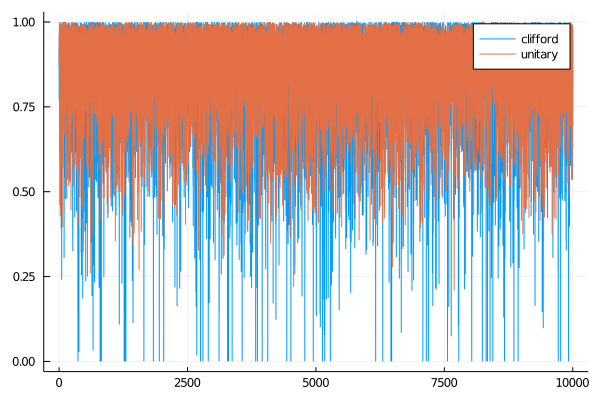

In [9]:
plot(1:total_run_number, distance_clifford[1:total_run_number], label="clifford")
plot!(1:total_run_number, distance_unitary[1:total_run_number], label="unitary")

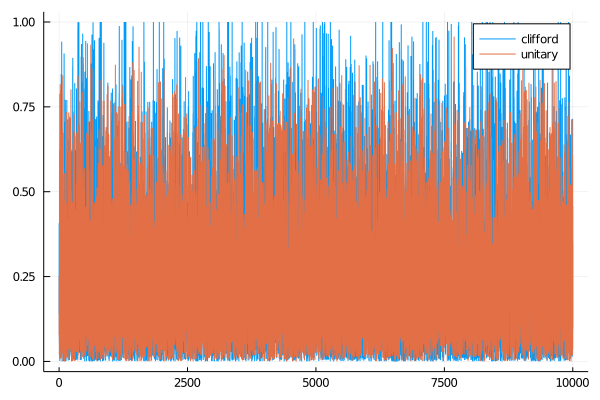

In [10]:
plot(1:total_run_number, fidelity_clifford[1:total_run_number], label="clifford")
plot!(1:total_run_number, fidelity_unitary[1:total_run_number], label="unitary")

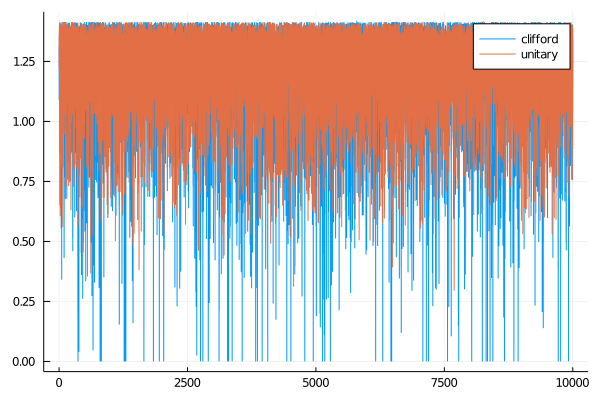

In [11]:
plot(1:total_run_number, hs_clifford[1:total_run_number], label="clifford")
plot!(1:total_run_number, hs_unitary[1:total_run_number], label="unitary")

# Referenze

[1]G. Benenti, G. Casati, S. Montangero, and D. L. Shepelyansky, ‘Efficient Quantum Computing of Complex Dynamics’, Phys. Rev. Lett., vol. 87, no. 22, p. 227901, Nov. 2001, doi: 10.1103/PhysRevLett.87.227901.

[2]D. L. Shepelyansky, ‘Quantum Chaos & Quantum Computers’, Physica Scripta, vol. T90, no. 1, p. 112, 2001, doi: 10.1238/Physica.Topical.090a00112.

[3]C. J. Turner, A. A. Michailidis, D. A. Abanin, M. Serbyn, and Z. Papić, ‘Weak ergodicity breaking from quantum many-body scars’, Nature Phys, vol. 14, no. 7, pp. 745–749, Jul. 2018, doi: 10.1038/s41567-018-0137-5.

[4]C. P. Gonçalves, ‘Quantum Chaos and Quantum Computing Structures’, arXiv:1208.2610 [cond-mat, physics:quant-ph], Aug. 2012, Accessed: Feb. 03, 2021. [Online]. Available: http://arxiv.org/abs/1208.2610.

[5]R. Koenig and J. A. Smolin, ‘How to efficiently select an arbitrary Clifford group element’, Journal of Mathematical Physics, vol. 55, no. 12, p. 122202, Dec. 2014, doi: 10.1063/1.4903507.

[6]P. Gawron, D. Kurzyk, and Ł. Pawela, ‘QuantumInformation.jl—A Julia package for numerical computation in quantum information theory’, PLoS ONE, vol. 13, no. 12, p. e0209358, Dec. 2018, doi: 10.1371/journal.pone.0209358.

[7] C. H. Bennett, D. P. DiVincenzo, J. A. Smolin,
and W. K. Wootters, Phys. Rev. A 54, 3824 (1996).
quant-ph/9604024.

[8] A. R. Calderbank, E. M. Rains, P. W. Shor, and
N. J. A. Sloane, Phys. Rev. Lett. 78, 405 (1997).
quant-ph/9605005.

[9] D. Gottesman, Phys. Rev. A 54, 1862 (1996). quant-ph/9604038.

[10] D. Gottesman, talk at International Conference
on Group Theoretic Methods in Physics (1998).
quant-ph/9807006.

[11]S. Aaronson and D. Gottesman, “Improved simulation of
stabilizer circuits” Phys. Rev. A. 70 no 5, 052328 (2004)
arXiv:quant-ph/0406196

[12]D. Gottesman, “The Heisenberg representation of quan-
tum computers,” quant-ph/9807006.


[13]J. Dehaene and B. De Moor, ‘Clifford group, stabilizer states, and linear and quadratic operations over GF(2)’, Phys. Rev. A, vol. 68, no. 4, p. 042318, Oct. 2003, doi: 10.1103/PhysRevA.68.042318.


[14]E. Knill, D. Leibfried, R. Reichle, J. Britton, R. B.
Blakestad, J. D. Jost, C. Langer, R. Ozeri, S. Seidelin,
and D. J. Wineland, Phys. Rev. A 77, 012307 (Jan 2008)     

[15]Dankert, Christoph; Cleve, Richard; Emerson, Joseph; Livine, Etera (2009). "Exact and Approximate Unitary 2-Designs: Constructions and Applications". Physical Review A. 80: 012304. arXiv:quant-ph/0606161. doi:10.1103/PhysRevA.80.012304.

[16]Emerson, Joseph; Alicki, Robert; Zyczkowski, Karol (2005). "Scalable noise estimation with random unitary operators". Journal of Optics B: Quantum and Semiclassical Optics. 7 (10): S347. arXiv:quant-ph/0503243. Bibcode:2005JOptB...7S.347E. doi:10.1088/1464-4266/7/10/021.

[17]P. Gawron, D. Kurzyk, and Ł. Pawela, ‘QuantumInformation.jl—A Julia package for numerical computation in quantum information theory’, PLoS ONE, vol. 13, no. 12, p. e0209358, Dec. 2018, doi: 10.1371/journal.pone.0209358.

[18]R. Koenig and J. A. Smolin, ‘How to efficiently select an arbitrary Clifford group element’, Journal of Mathematical Physics, vol. 55, no. 12, p. 122202, Dec. 2014, doi: 10.1063/1.4903507.